# Label Analysis from Exported Data
This notebook loads the previously exported datasets (`segments_meta.csv` and `segments_values.csv`) and produces basic analytics and visualizations.

In [1]:
# Load exported datasets
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DATA_DIR = os.path.abspath("../data")
EXPORT_DIR = os.path.join(BASE_DATA_DIR, "export")
meta_csv = os.path.join(EXPORT_DIR, "segments_meta.csv")
values_csv = os.path.join(EXPORT_DIR, "segments_values.csv")

print("Using export dir:", EXPORT_DIR)
print("Meta CSV exists:", os.path.exists(meta_csv))
print("Values CSV exists:", os.path.exists(values_csv))

df_meta = pd.read_csv(meta_csv)
df_values = pd.read_csv(values_csv)
print("df_meta shape:", df_meta.shape)
print("df_values shape:", df_values.shape)
df_meta.head()

Using export dir: /work/data/export
Meta CSV exists: True
Values CSV exists: True
df_meta shape: (144, 5)
df_values shape: (4951, 8)


,csv_file,label,start,end,length
0,GSPC_2025-09-25_to_2025-09-29_5m.csv,Bearish Pennant,2025-09-29 15:00,2025-09-29 16:00,13
1,GSPC_2025-09-25_to_2025-09-29_5m.csv,Bearish Wedge,2025-09-26 13:55,2025-09-26 15:30,20
2,GSPC_2025-09-25_to_2025-09-29_5m.csv,Bullish Pennant,2025-09-25 13:40,2025-09-25 14:45,14
3,GSPC_2025-09-30_to_2025-10-04_5m.csv,Bearish Pennant,2025-10-02 13:30,2025-10-02 15:35,26
4,GSPC_2025-10-05_to_2025-10-09_5m.csv,Bearish Wedge,2025-10-07 13:30,2025-10-07 17:45,52


label
Bullish Normal     40
Bearish Normal     27
Bearish Pennant    26
Bullish Pennant    22
Bullish Wedge      15
Bearish Wedge      14
Name: count, dtype: int64


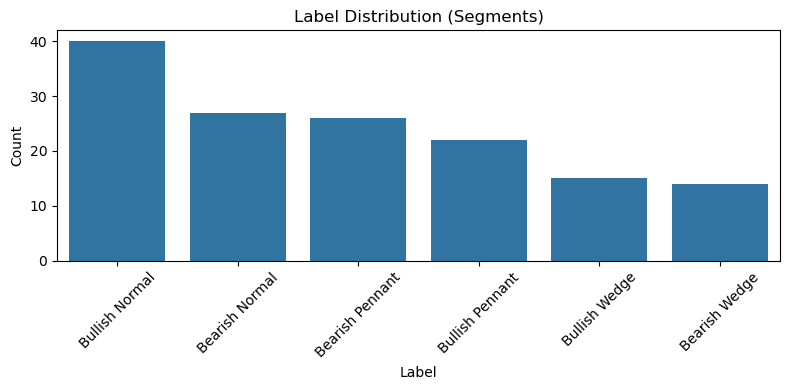

In [2]:
# Label distribution
label_counts = df_meta["label"].value_counts()
print(label_counts)

plt.figure(figsize=(8,4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Distribution (Segments)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Length stats:
count    144.000000
mean      34.381944
std       46.002888
min        5.000000
25%       18.000000
50%       24.500000
75%       35.250000
max      393.000000
Name: length, dtype: float64


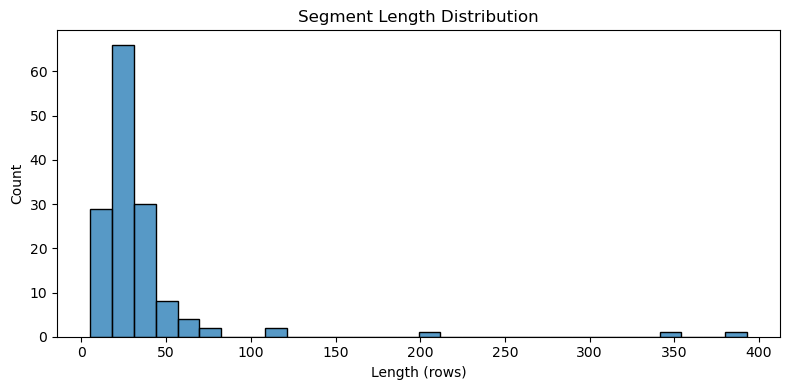

In [3]:
# Segment length statistics
print("Length stats:")
print(df_meta["length"].describe())

plt.figure(figsize=(8,4))
sns.histplot(df_meta["length"], bins=30)
plt.title("Segment Length Distribution")
plt.xlabel("Length (rows)")
plt.tight_layout()
plt.show()

Numeric columns available: ['open', 'high', 'low', 'close']


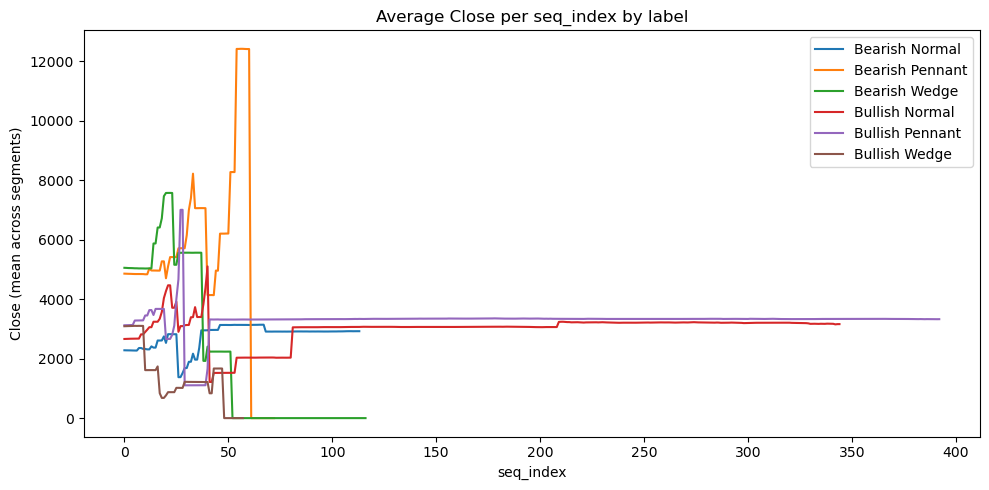

In [5]:
# Example time series slice per label (mean close by seq_index)
# If the numeric columns include 'Close', aggregate per label for visualization
available_cols = set(df_values.columns)
num_cols = [c for c in ["open","high","low","close"] if c in available_cols]
print("Numeric columns available:", num_cols)

if "close" in available_cols:
    agg = (df_values.groupby(["label","segment_id","seq_index"])
           ["close"].mean().reset_index())
    plt.figure(figsize=(10,5))
    for lbl in agg["label"].unique():
        sub = agg[agg["label"] == lbl]
        # Plot the mean over segments at each seq_index
        series = sub.groupby("seq_index")["close"].mean()
        plt.plot(series.index, series.values, label=str(lbl))
    plt.title("Average Close per seq_index by label")
    plt.xlabel("seq_index")
    plt.ylabel("Close (mean across segments)")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("'Close' column not found in combined values CSV.")